<a id='content'></a>
# <center>Twitter Analyse</center>
Im Folgenden werden die via <b>Twitter API</b> extrahierten Daten ausgwertet und visualisiert. Die Einzelbetrachtung ermöglicht eine Einsicht in das Twitter Nutzungsverhalten konkreter Unternehmen. Der anschließende Gesamtvergleich vereint die einzelnen Datensätzen zu einem Gesamtdatensatz, welcher einen Überblick über das Verhalten innerhalb der betrachteten Konkurrenzunternehmen, (inklusive der Arend Prozessautomation Gmbh selbst) stellvertretend für den Mittelstand, ermöglicht.

Lediglich <b>2 der 5</b> betrachteten Konkurrenzunternehmen besitzen eine Präsenz auf Twitter. Die Unternehmen Natus GmbH & Co. KG, KSV sowie die Köhl Unternehmensgruppe sind nicht in diesem sozialen Netzwerk vertreten.

Als Vergleichsunternehmen dienen die großen Unternehmen <b>Beckhoff Automation</b> sowie die <b>Pilz GmbH & Co. KG</b>, welche ebenfalls in der Automationsbranche tätig sind und bereits größere Social Media Kanäle etabliert haben.
Die Gegenüberstellung der betrachteten Mittelständler mit den beiden Vergleichsunternehmen zeigt Unterschiede und Gemeinsamkeiten im Nutzungsverhalten in übersichtlichen Diagrammen auf.

<u>Fazit:</u><br>
Twitter ist, verglichen mit Facebook, im Mittelstand deutlich weniger genutzt - lediglich 2 der zu betrachtenden Unternehmen nutzen die Plattform. Größere Unternehmen der Branche haben jedoch ein sehr hohes Aufkommen an Tweets, was mit einer starken Präsenz auf Twitter einhergeht.
Hier sind die Unterscheide aktuell also noch bedeutend stärker ausgeprägt als auf anderen Social Media Kanälen.

Die aufgeführten Graphen/Grafiken dienen als Grundlage zur Ausformulierung der Bachelorarbeit.

Alle Berechnungen, Visualisierungen und Datenerhebungen wurden mit Hilfe der Programmiersprache <i>Python</i> durchgeführt.

<u>Stand:</u> 13. Januar 2017
## <center>Inhaltsverzeichnis</center>
<br>
<i>Branchenintern</i>
<li><a href='#arend'>Arend Prozessautomation GmbH</a></li>
<li><a href='#blumenbecker'>Blumenbecker Group</a></li>

<i>Vergleichsunternehmen</i>
<li><a href='#beckhoff'>Beckhoff Automation</a></li>
<li><a href='#pilz'>Pilz GmbH & Co. KG</a></li>
<br>
<li><a href='#branche'>Vergleich Mittelstand vs. Größere Unternehmen</a></li>



In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import json
from collections import defaultdict, Counter

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()

from matplotlib.pyplot import pie, axis, show

%matplotlib inline

plt.rc('font',family='Times New Roman')

In [15]:
def getHashtags(tweet):
    entities = tweet.get('entities', {})
    hashtags = entities.get('hashtags', [])
    return [tag['text'].lower() for tag in hashtags]

def hashtagAmount(data):
    tags = []
    tagCount = defaultdict(int)
    for hashtag in data['hashtags']:
        try:
            tags.append(hashtag.replace('[', '').replace(']', '').split(','))
        except:
            tags.append([])
    
    for tag in tags:
        amount = len(tag)
        tagCount[amount] += 1
    
    #Calculations
    with_hashtags = sum([count for n_of_tags, count in tagCount.items() if n_of_tags > 0])
    no_hashtags = tagCount[0]
    total = no_hashtags + with_hashtags
    with_hashtags_percent = "%.2f" % (with_hashtags / total * 100)
    no_hashtags_percent = "%.2f" % (no_hashtags / total * 100)
    
    #Print results
    print("{} tweets without hashtags ({}%)".format(no_hashtags, no_hashtags_percent))
    print("{} tweets with at least one hashtag ({}%)".format(with_hashtags, with_hashtags_percent))
    
    for tagCount, tweet_count in tagCount.items():
            if tagCount > 0:
                percent_total = "%.2f" % (tweet_count / total * 100)
                percent_elite = "%.2f" % (tweet_count / with_hashtags * 100)
                print("{} tweets with {} hashtags ({}% total, {}% elite)".format(tweet_count,
                                                                                 tagCount,
                                                                                 percent_total,
                                                                                 percent_elite))

def commonHashtags(fname):
    """
    Get most common hashtags for input jsonl file.
    """
    with open(fname, 'r') as f:
        hashtags = Counter()
        for line in f:
            tweet = json.loads(line)
            hashtags_in_tweet = getHashtags(tweet)
            hashtags.update(hashtags_in_tweet)

        for tag, count in hashtags.most_common(5):
            print('{}: {}'.format(tag, count))

In [16]:
arend = pd.read_csv('ARENDAutomation_twitter.csv')
blumenbecker = pd.read_csv('BLUMENBECKER_twitter.csv')
beckhoff = pd.read_csv('Beckhoff_DE_twitter.csv')
pilz = pd.read_csv('Pilz_INT_twitter.csv')

ms = pd.concat([arend, blumenbecker])
vu = pd.concat([beckhoff, pilz])

total = pd.concat([ms, vu])
total.to_csv("twitter_total.csv")

---
<a id='arend'></a>
# <center>AREND PROZESSAUTOMATION GMBH</center>
### <center><i><a href='http://twitter.com/ARENDAutomation'>@ARENDAutomation</a></i></center>
---

In [17]:
print('Insgesamt {posts} Tweets zu analysieren.'.format(posts=len(arend)))

Insgesamt 30 Tweets zu analysieren.


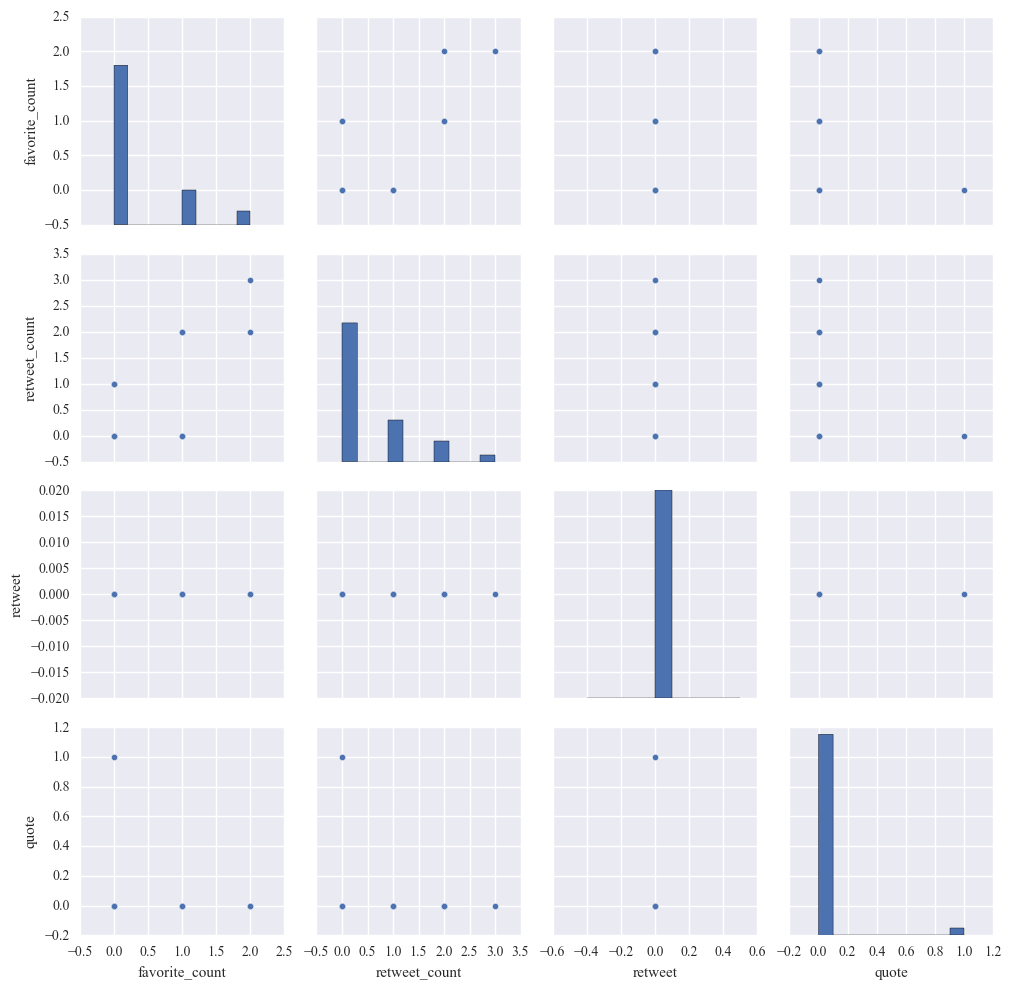

In [18]:
sns.pairplot(arend)

In [19]:
hashtagAmount(arend)

13 tweets without hashtags (0.00%)
17 tweets with at least one hashtag (0.00%)
11 tweets with 1 hashtags (0.00% total, 0.00% elite)
4 tweets with 2 hashtags (0.00% total, 0.00% elite)
2 tweets with 3 hashtags (0.00% total, 0.00% elite)


In [20]:
commonHashtags('ARENDAutomation_twitter.jsonl')

arend40: 4
industrie40: 3
spsipcdrives: 2
crowdinvesting: 2
digitalisierung: 2


In [21]:
dates = [dt.datetime.strptime(d,'%Y-%m-%d %H:%M:%S').date() for d in arend['created_at']]
favorites = arend['favorite_count']
retweets = arend['retweet_count']

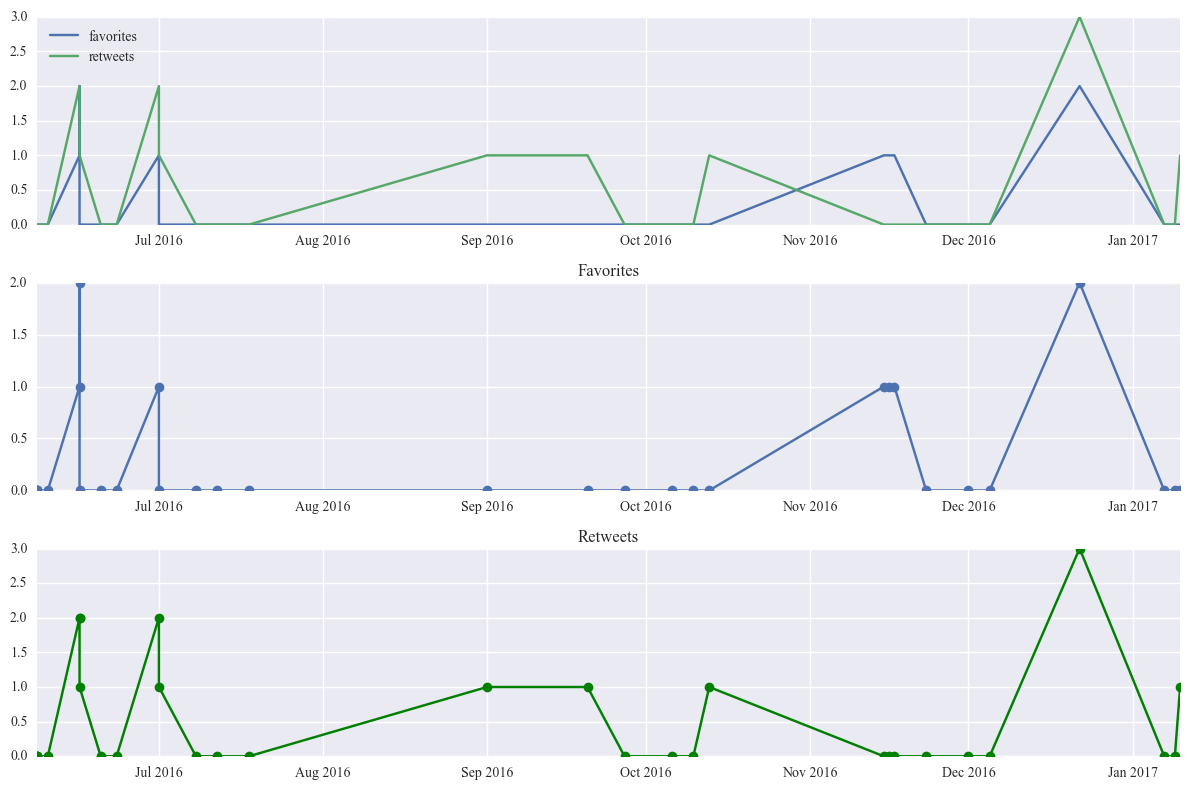

In [22]:
fig1, axes = plt.subplots(nrows=3, ncols=1, figsize=(12,8))
axes[0].plot(dates,favorites, label='favorites')
axes[0].plot(dates,retweets, label='retweets')
axes[0].legend(loc=0)

axes[1].plot(dates,favorites, label='favorites', marker='o')
axes[1].set_title('Favorites')

axes[2].plot(dates,retweets, 'g', label='retweets', marker='o')
axes[2].set_title('Retweets')

fig1.tight_layout()
fig1.savefig("Arend_Timeline_Twitter.png", dpi=300)

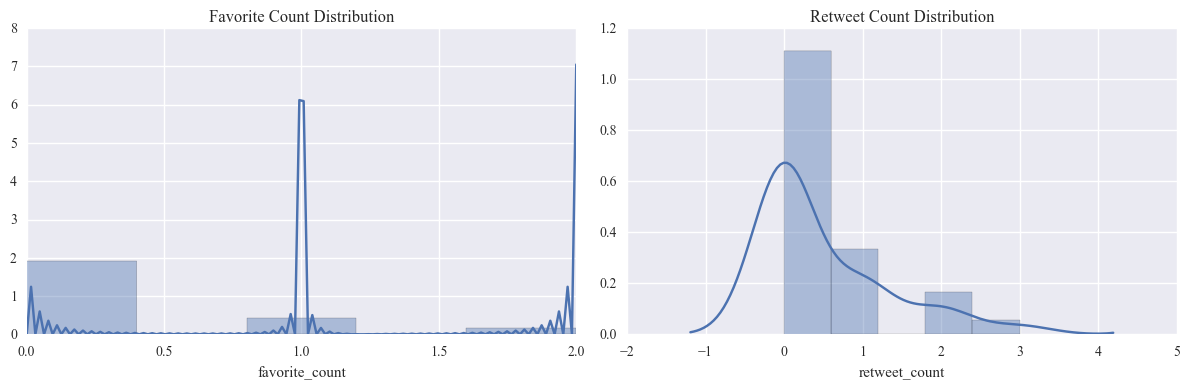

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
sns.distplot(arend['favorite_count'], ax=ax1)
ax1.set_title('Favorite Count Distribution')

sns.distplot(arend['retweet_count'], ax=ax2)
ax2.set_title('Retweet Count Distribution')
fig.tight_layout()

fig.savefig('Arend_Distribution.png', dpi=300)

---
<a id='blumenbecker'></a>
# <center>BLUMENBECKER GROUP</center>
### <center><i><a href='http://twitter.com/BLUMENBECKER'>@BLUMENBECKER</a></i></center>
---

In [24]:
print('Insgesamt {posts} Tweets zu analysieren.'.format(posts=len(blumenbecker)))

Insgesamt 368 Tweets zu analysieren.


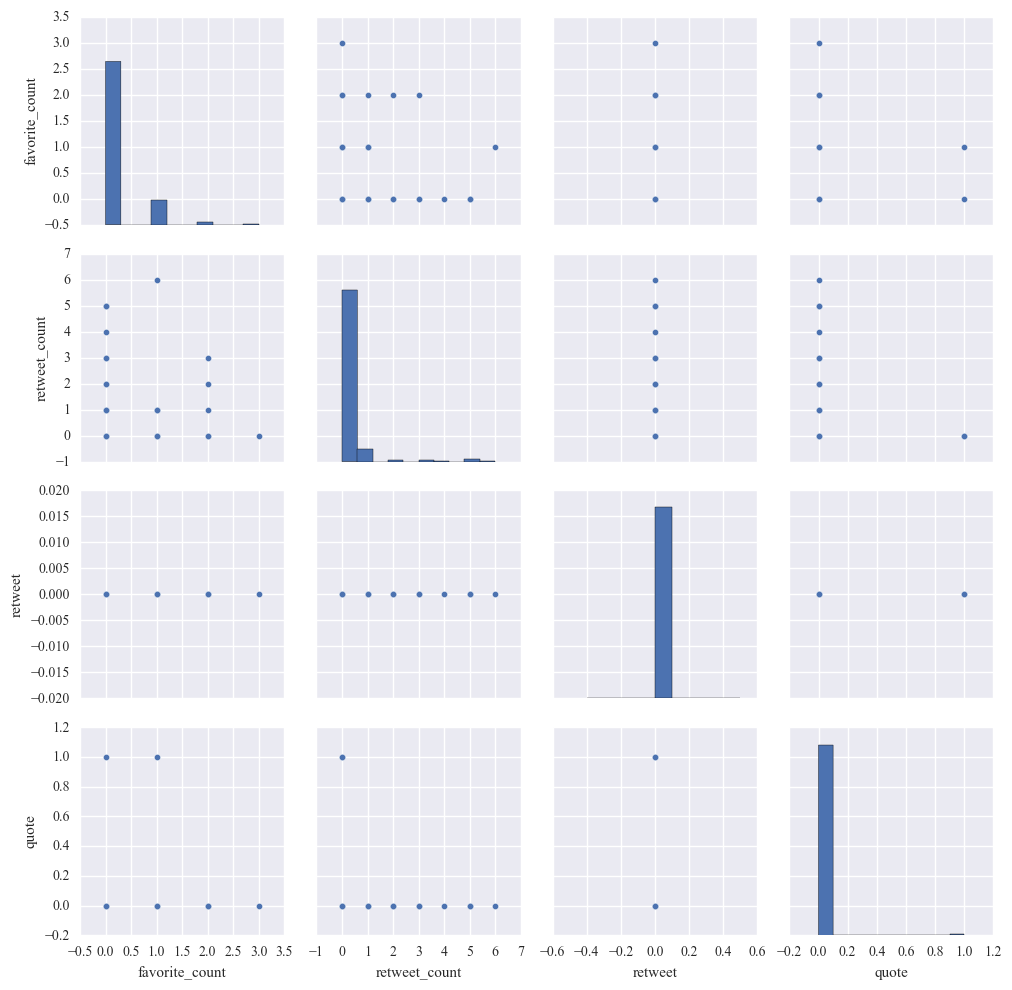

In [25]:
sns.pairplot(blumenbecker)

In [26]:
hashtagAmount(blumenbecker)

232 tweets without hashtags (0.00%)
136 tweets with at least one hashtag (0.00%)
77 tweets with 1 hashtags (0.00% total, 0.00% elite)
44 tweets with 2 hashtags (0.00% total, 0.00% elite)
10 tweets with 3 hashtags (0.00% total, 0.00% elite)
4 tweets with 4 hashtags (0.00% total, 0.00% elite)
1 tweets with 5 hashtags (0.00% total, 0.00% elite)


In [27]:
commonHashtags('BLUMENBECKER_twitter.jsonl')

automatica16: 16
hm16: 12
ixn: 10
ixe: 9
automatisierungstechnik: 6


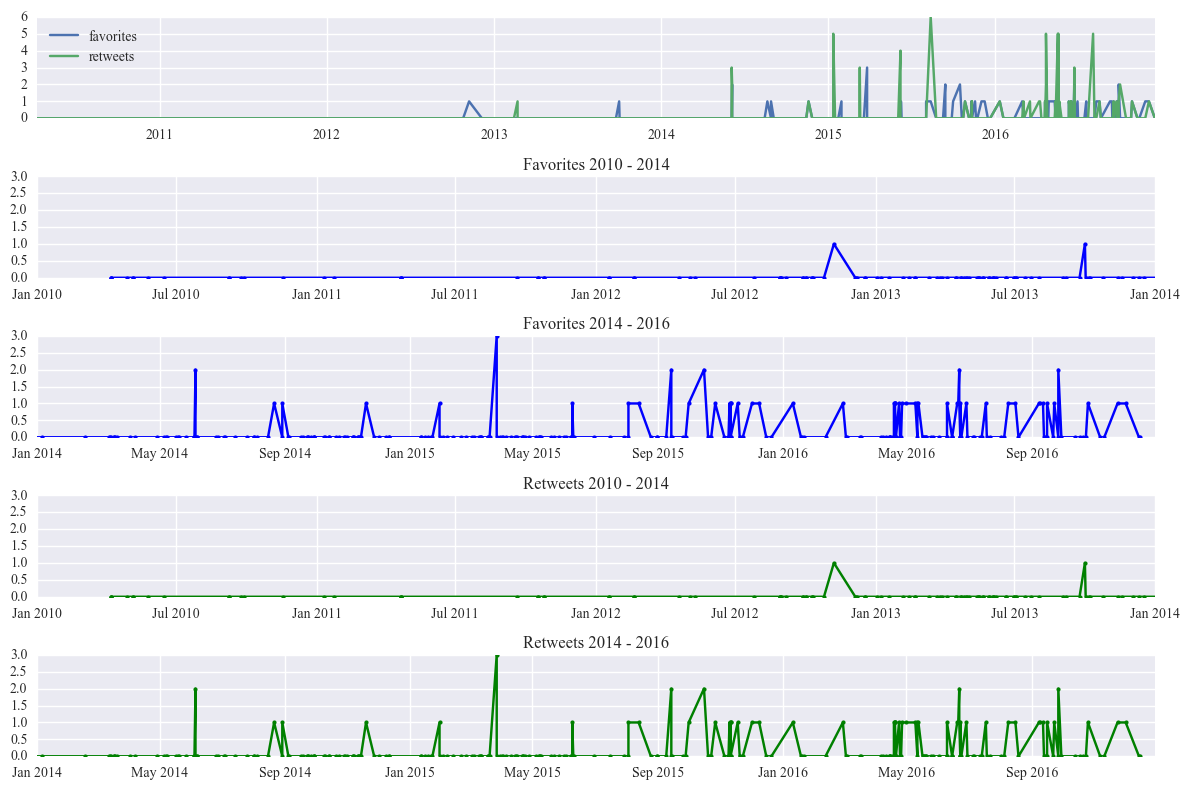

In [28]:
dates = [dt.datetime.strptime(d,'%Y-%m-%d %H:%M:%S').date() for d in blumenbecker['created_at']]
favorites = blumenbecker['favorite_count']
retweets = blumenbecker['retweet_count']

dateend = dt.datetime(2016,12,31)
datestart1 = dt.datetime(2010,1,1)
datestart2 = dt.datetime(2014,1,1)

fig1, axes = plt.subplots(nrows=5, ncols=1, figsize=(12,8))
axes[0].plot(dates,favorites, label='favorites')
axes[0].plot(dates,retweets, label='retweets')
axes[0].legend(loc=0)

axes[1].plot(dates,favorites, 'b', label='favorites', marker='o', markersize='3')
axes[1].set_xlim(datestart1, datestart2)
axes[1].set_title('Favorites 2010 - 2014')

axes[2].plot(dates,favorites, 'b', label='retweets', marker='o', markersize='3')
axes[2].set_xlim(datestart2, dateend)
axes[2].set_title('Favorites 2014 - 2016')

axes[3].plot(dates,favorites, 'g', label='retweets', marker='o', markersize='3')
axes[3].set_xlim(datestart1, datestart2)
axes[3].set_title('Retweets 2010 - 2014')

axes[4].plot(dates,favorites, 'g', label='retweets', marker='o', markersize='3')
axes[4].set_xlim(datestart2, dateend)
axes[4].set_title('Retweets 2014 - 2016')

fig1.tight_layout()

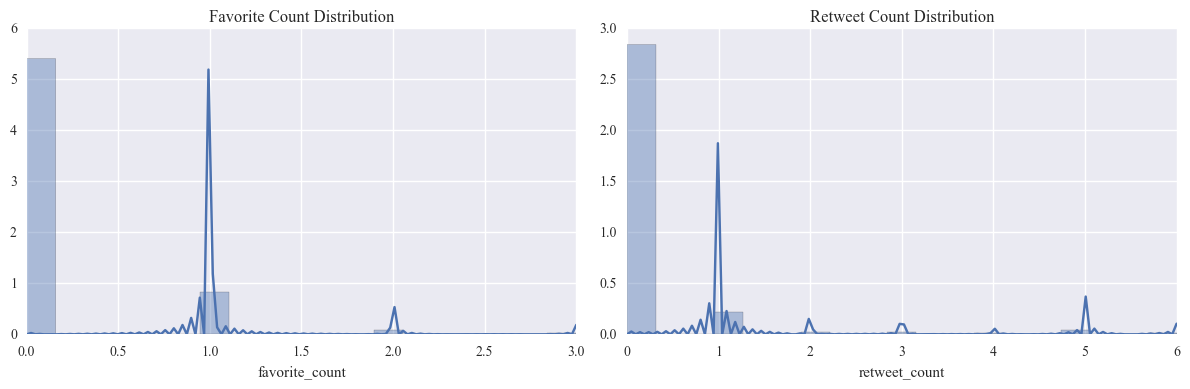

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
sns.distplot(blumenbecker['favorite_count'], ax=ax1)
ax1.set_title('Favorite Count Distribution')

sns.distplot(blumenbecker['retweet_count'], ax=ax2)
ax2.set_title('Retweet Count Distribution')
fig.tight_layout()


---
<a id='beckhoff'></a>
# <center>Beckhoff Automation (DE)</center>
### <center><i><a href='http://twitter.com/Beckhoff_DE'>@Beckhoff_DE</a></i></center>
###### <center><i><u>Anmerkung:</u></i> Der deutsche Beckhoff Twitter Account wird analysiert.</center>
---

In [30]:
print('Insgesamt {posts} Tweets zu analysieren.'.format(posts=len(beckhoff)))

Insgesamt 704 Tweets zu analysieren.


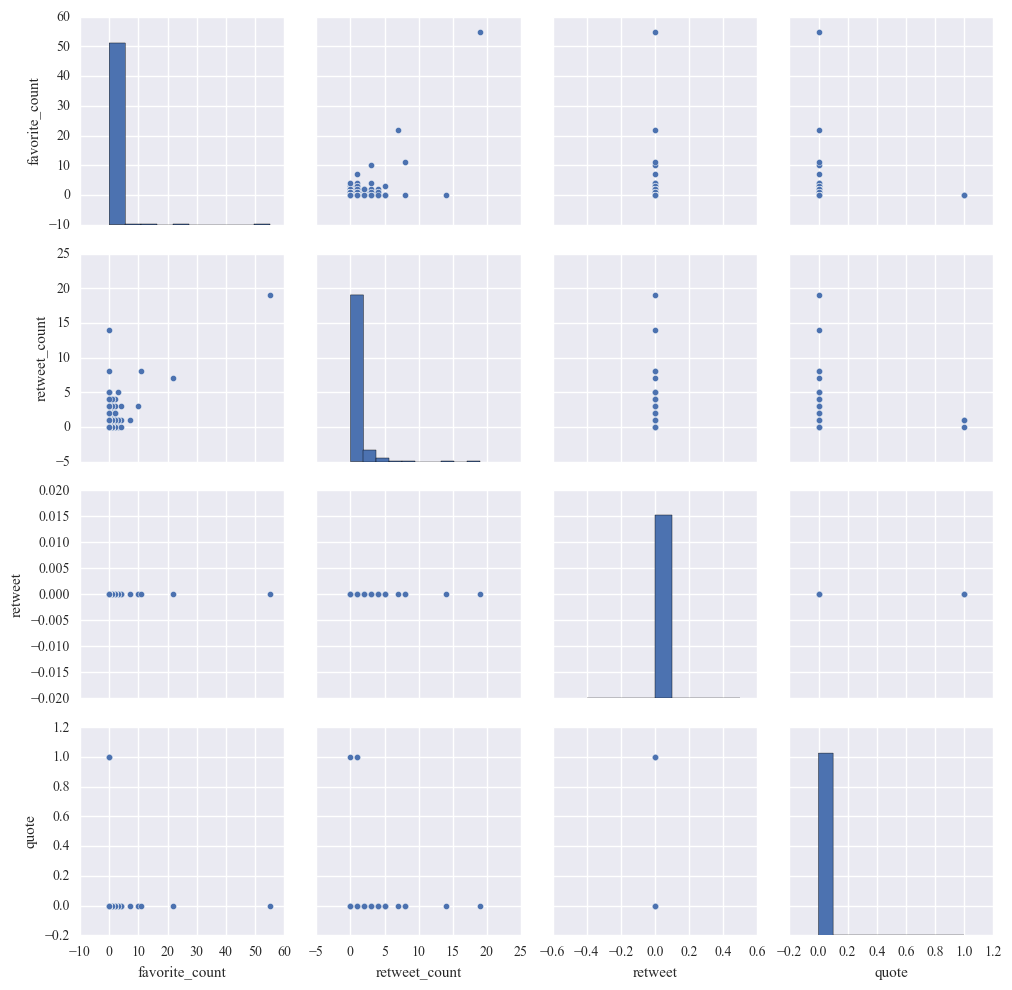

In [31]:
sns.pairplot(beckhoff)

In [32]:
hashtagAmount(beckhoff)

578 tweets without hashtags (0.00%)
126 tweets with at least one hashtag (0.00%)
92 tweets with 1 hashtags (0.00% total, 0.00% elite)
23 tweets with 2 hashtags (0.00% total, 0.00% elite)
9 tweets with 3 hashtags (0.00% total, 0.00% elite)
1 tweets with 4 hashtags (0.00% total, 0.00% elite)
1 tweets with 5 hashtags (0.00% total, 0.00% elite)


In [33]:
commonHashtags('Beckhoff_DE_twitter.jsonl')

sps_live: 33
hm16: 24
industrie40: 22
iot: 15
hm15: 11


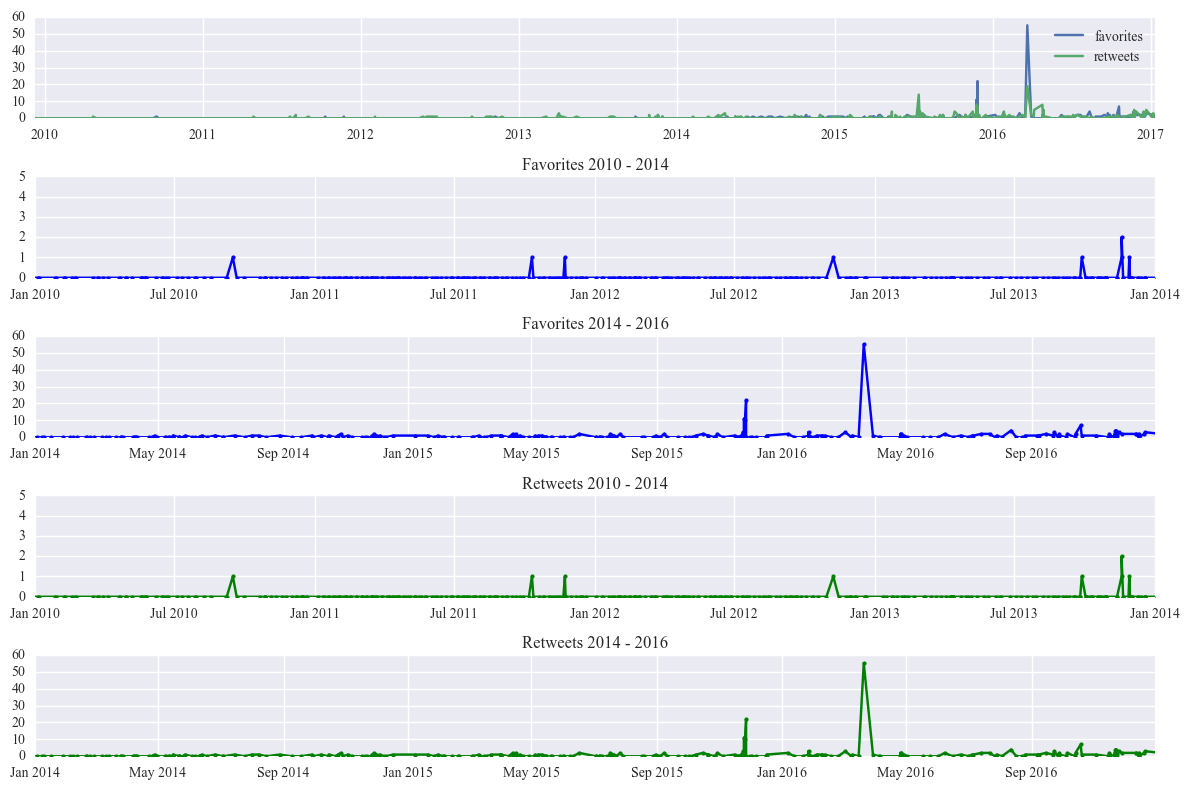

In [34]:
dates = [dt.datetime.strptime(d,'%Y-%m-%d %H:%M:%S').date() for d in beckhoff['created_at']]
favorites = beckhoff['favorite_count']
retweets = beckhoff['retweet_count']

dateend = dt.datetime(2016,12,31)
datestart1 = dt.datetime(2010,1,1)
datestart2 = dt.datetime(2014,1,1)

fig1, axes = plt.subplots(nrows=5, ncols=1, figsize=(12,8))
axes[0].plot(dates,favorites, label='favorites')
axes[0].plot(dates,retweets, label='retweets')
axes[0].legend(loc=0)

axes[1].plot(dates,favorites, 'b', label='favorites', marker='o', markersize='3')
axes[1].set_xlim(datestart1, datestart2)
axes[1].set_ylim(0,5)
axes[1].set_title('Favorites 2010 - 2014')

axes[2].plot(dates,favorites, 'b', label='retweets', marker='o', markersize='3')
axes[2].set_xlim(datestart2, dateend)
axes[2].set_title('Favorites 2014 - 2016')

axes[3].plot(dates,favorites, 'g', label='retweets', marker='o', markersize='3')
axes[3].set_xlim(datestart1, datestart2)
axes[3].set_ylim(0,5)
axes[3].set_title('Retweets 2010 - 2014')

axes[4].plot(dates,favorites, 'g', label='retweets', marker='o', markersize='3')
axes[4].set_xlim(datestart2, dateend)
axes[4].set_title('Retweets 2014 - 2016')

fig1.tight_layout()

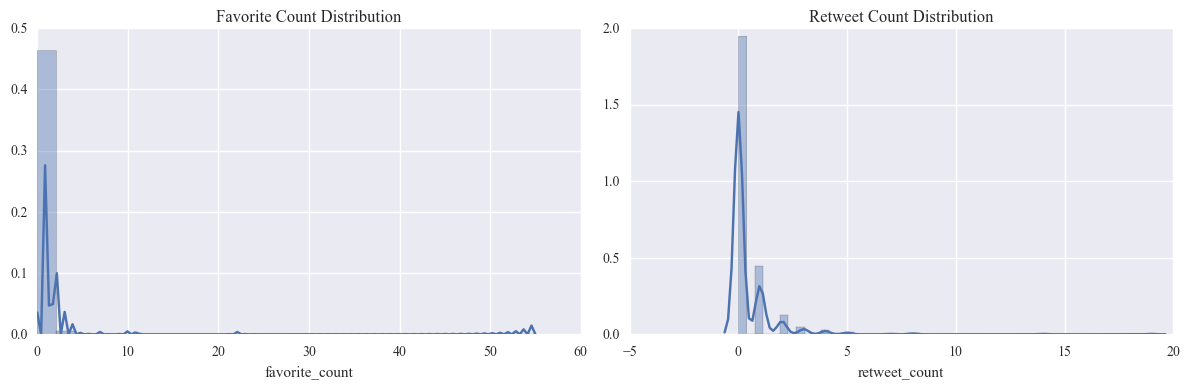

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
sns.distplot(beckhoff['favorite_count'], ax=ax1)
ax1.set_title('Favorite Count Distribution')

sns.distplot(beckhoff['retweet_count'], ax=ax2)
ax2.set_title('Retweet Count Distribution')
fig.tight_layout()

---
<a id='pilz'></a>
# <center>Pilz Gmbh & Co. KG</center>
### <center><i><a href='http://twitter.com/Pilz_INT'>@Pilz_INT</a></i></center>
---

In [36]:
print('Insgesamt {posts} Tweets zu analysieren.'.format(posts=len(pilz)))

Insgesamt 2154 Tweets zu analysieren.


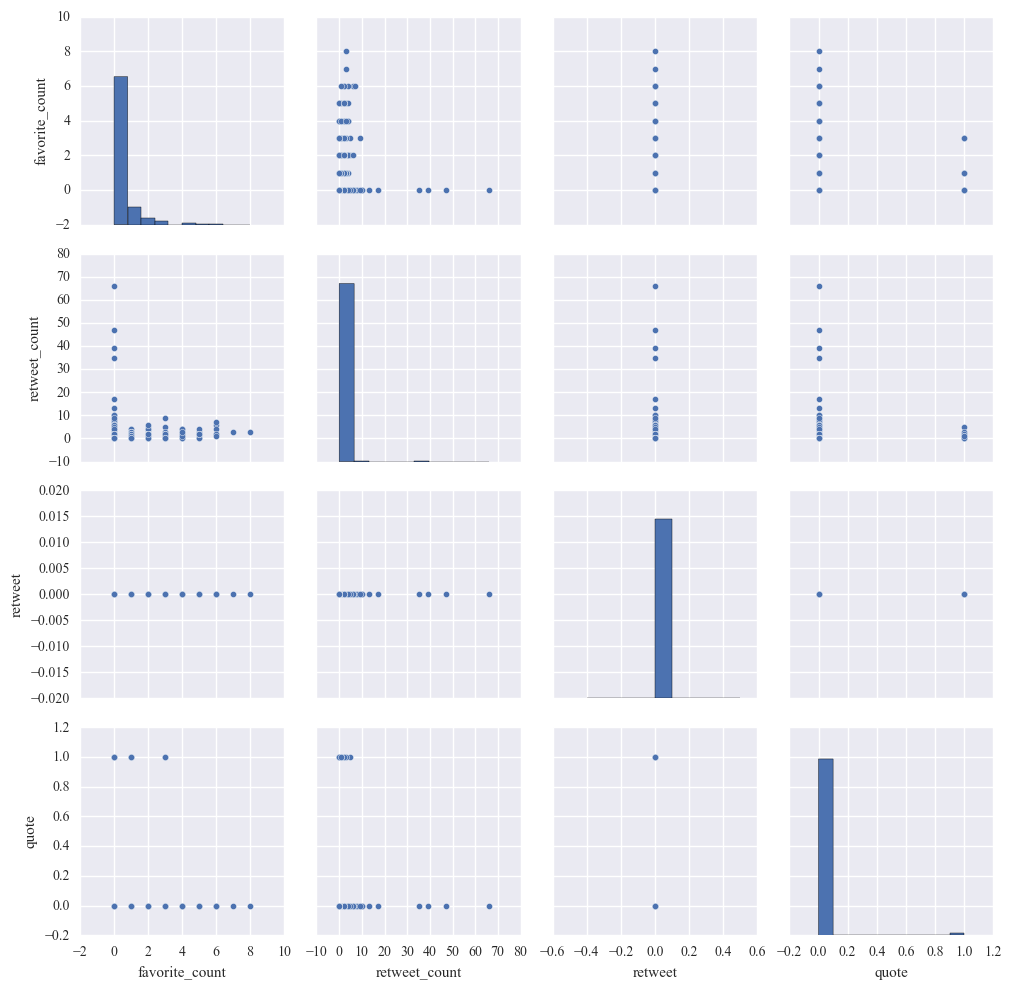

In [37]:
sns.pairplot(pilz)

In [38]:
hashtagAmount(pilz)

851 tweets without hashtags (0.00%)
1303 tweets with at least one hashtag (0.00%)
788 tweets with 1 hashtags (0.00% total, 0.00% elite)
338 tweets with 2 hashtags (0.00% total, 0.00% elite)
127 tweets with 3 hashtags (0.00% total, 0.00% elite)
29 tweets with 4 hashtags (0.00% total, 0.00% elite)
18 tweets with 5 hashtags (0.00% total, 0.00% elite)
2 tweets with 6 hashtags (0.00% total, 0.00% elite)
1 tweets with 7 hashtags (0.00% total, 0.00% elite)


In [39]:
commonHashtags('pilz_INT_twitter.jsonl')

sps13: 96
automation: 76
hm15: 58
maschinensicherheit: 51
hm16: 48


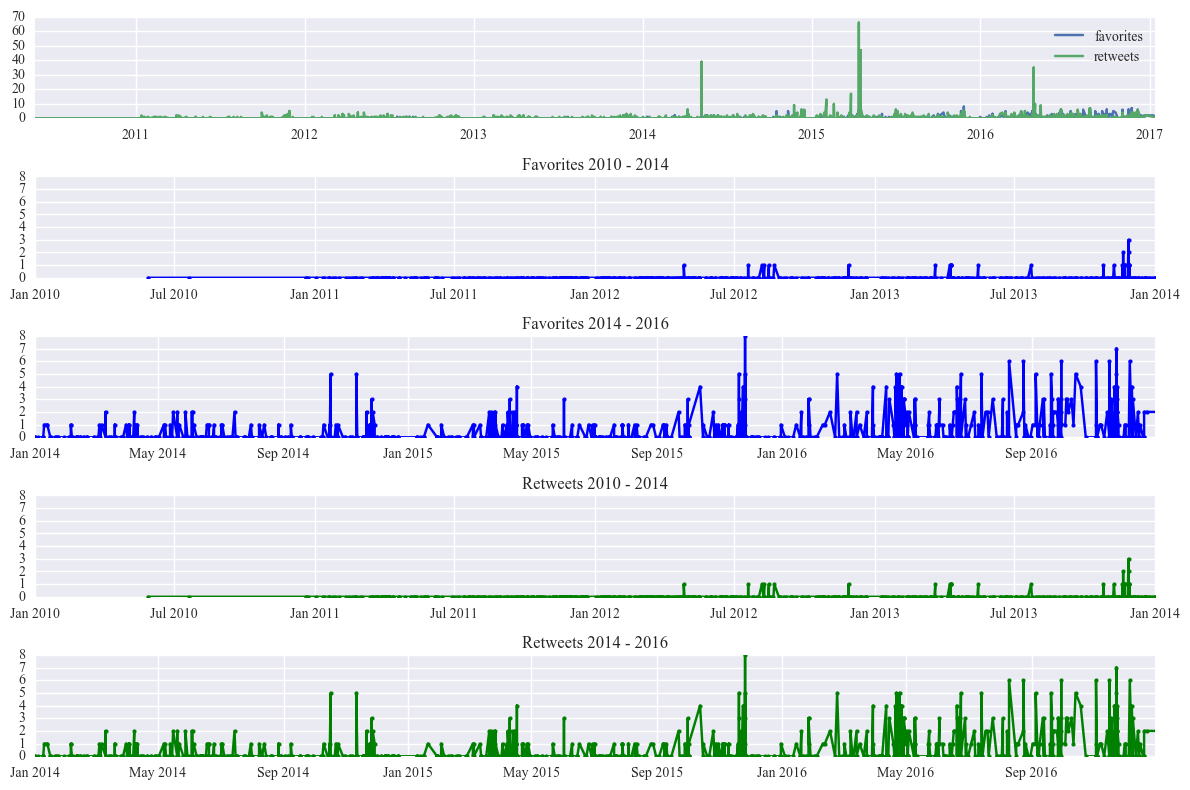

In [40]:
dates = [dt.datetime.strptime(d,'%Y-%m-%d %H:%M:%S').date() for d in pilz['created_at']]
favorites = pilz['favorite_count']
retweets = pilz['retweet_count']

dateend = dt.datetime(2016,12,31)
datestart1 = dt.datetime(2010,1,1)
datestart2 = dt.datetime(2014,1,1)

fig1, axes = plt.subplots(nrows=5, ncols=1, figsize=(12,8))
axes[0].plot(dates,favorites, label='favorites')
axes[0].plot(dates,retweets, label='retweets')
axes[0].legend(loc=0)

axes[1].plot(dates,favorites, 'b', label='favorites', marker='o', markersize='3')
axes[1].set_xlim(datestart1, datestart2)
axes[1].set_title('Favorites 2010 - 2014')

axes[2].plot(dates,favorites, 'b', label='retweets', marker='o', markersize='3')
axes[2].set_xlim(datestart2, dateend)
axes[2].set_title('Favorites 2014 - 2016')

axes[3].plot(dates,favorites, 'g', label='retweets', marker='o', markersize='3')
axes[3].set_xlim(datestart1, datestart2)
axes[3].set_title('Retweets 2010 - 2014')

axes[4].plot(dates,favorites, 'g', label='retweets', marker='o', markersize='3')
axes[4].set_xlim(datestart2, dateend)
axes[4].set_title('Retweets 2014 - 2016')

fig1.tight_layout()

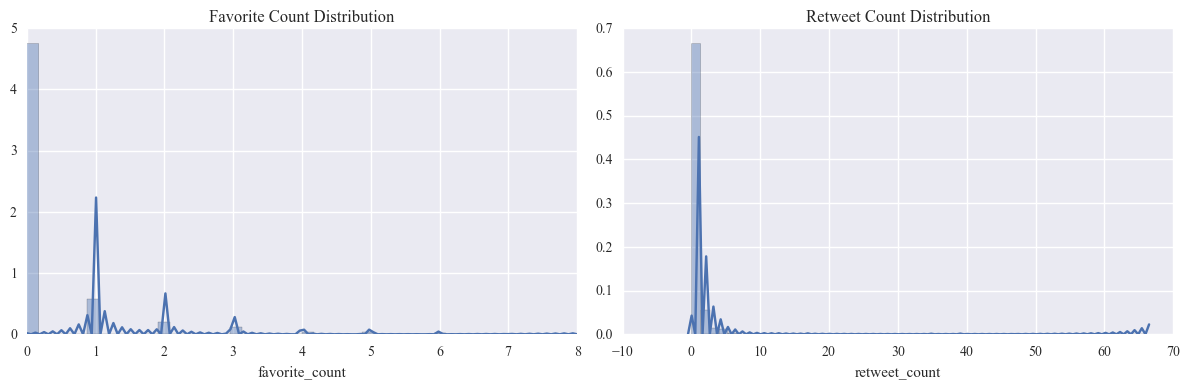

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
sns.distplot(pilz['favorite_count'], ax=ax1)
ax1.set_title('Favorite Count Distribution')

sns.distplot(pilz['retweet_count'], ax=ax2)
ax2.set_title('Retweet Count Distribution')
fig.tight_layout()

---
<a id='branche'></a>
# <center>Mittelstand vs. Vergleichsunternehmen</center>
---

In [42]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 367
Data columns (total 9 columns):
company           398 non-null object
created_at        398 non-null object
favorite_count    398 non-null int64
retweet_count     398 non-null int64
reply_to          15 non-null object
content           398 non-null object
hashtags          153 non-null object
retweet           398 non-null bool
quote             398 non-null bool
dtypes: bool(2), int64(2), object(5)
memory usage: 25.7+ KB


In [43]:
ms.groupby('company').describe()

favorite_count  retweet_count
company                                             
ARENDAutomation count       30.000000      30.000000
                mean         0.300000       0.500000
                std          0.595963       0.820008
                min          0.000000       0.000000
                25%          0.000000       0.000000
                50%          0.000000       0.000000
                75%          0.000000       1.000000
                max          2.000000       3.000000
BLUMENBECKER    count      368.000000     368.000000
                mean         0.165761       0.203804
                std          0.426917       0.784236
                min          0.000000       0.000000
                25%          0.000000       0.000000
                50%          0.000000       0.000000
                75%          0.000000       0.000000
                max          3.000000       6.000000

In [44]:
vu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2858 entries, 0 to 2153
Data columns (total 9 columns):
company           2858 non-null object
created_at        2858 non-null object
favorite_count    2858 non-null int64
retweet_count     2858 non-null int64
reply_to          131 non-null object
content           2858 non-null object
hashtags          1429 non-null object
retweet           2858 non-null bool
quote             2858 non-null bool
dtypes: bool(2), int64(2), object(5)
memory usage: 184.2+ KB


#### Hashtag Verwendung im Mittelstand

In [45]:
hashtagAmount(ms)

245 tweets without hashtags (0.00%)
153 tweets with at least one hashtag (0.00%)
88 tweets with 1 hashtags (0.00% total, 0.00% elite)
48 tweets with 2 hashtags (0.00% total, 0.00% elite)
12 tweets with 3 hashtags (0.00% total, 0.00% elite)
4 tweets with 4 hashtags (0.00% total, 0.00% elite)
1 tweets with 5 hashtags (0.00% total, 0.00% elite)


#### Hashtag Verwendung in Vergleichsunternehmen

In [46]:
hashtagAmount(vu)

1429 tweets without hashtags (0.00%)
1429 tweets with at least one hashtag (0.00%)
880 tweets with 1 hashtags (0.00% total, 0.00% elite)
361 tweets with 2 hashtags (0.00% total, 0.00% elite)
136 tweets with 3 hashtags (0.00% total, 0.00% elite)
30 tweets with 4 hashtags (0.00% total, 0.00% elite)
19 tweets with 5 hashtags (0.00% total, 0.00% elite)
2 tweets with 6 hashtags (0.00% total, 0.00% elite)
1 tweets with 7 hashtags (0.00% total, 0.00% elite)


In [47]:
sum([1,2,3])

6

In [71]:
ms_sum = sum([245, 88, 48, 23, 4, 2, 0])
vs_sum = sum([1429, 880, 361, 136, 30, 19, 3])

trace1 = Bar(
    x=['Mittelstand', 'Vergleichsunternehmen'],
    y=[245 * 100 /ms_sum, 1429 * 100 /vs_sum],
    name='0 Hashtags'
)

trace2 = Bar(
    x=['Mittelstand', 'Vergleichsunternehmen'],
    y=[88 * 100 /ms_sum, 880 * 100 /vs_sum],
    name='1 Hashtag'
)

trace3 = Bar(
    x=['Mittelstand', 'Vergleichsunternehmen'],
    y=[48 * 100 /ms_sum, 361 * 100 /vs_sum],    
    name='2 Hashtags'
)

trace4 = Bar(
    x=['Mittelstand', 'Vergleichsunternehmen'],
    y=[23 * 100 /ms_sum, 136 * 100 /vs_sum],
    name='3 Hashtags'
)

trace5 = Bar(
    x=['Mittelstand', 'Vergleichsunternehmen'],
    y=[4 * 100 /ms_sum, 30 * 100 /vs_sum],
    name='4 Hashtags'
)

trace6 = Bar(
    x=['Mittelstand', 'Vergleichsunternehmen'],
    y=[2 * 100 /ms_sum, 19 * 100 /vs_sum],
    name='5 Hashtags'
)

trace7 = Bar(
    x=['Mittelstand', 'Vergleichsunternehmen'],
    y=[0 * 100 /ms_sum, 3 * 100 /vs_sum],
    name='> 5 Hashtags'
)
data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7]
layout = Layout(
    barmode='group',
    title='Hashtag Anzahl pro Beitrag',
    yaxis = {'title': 'in Prozent'},
    font = {'family': 'Times New Roman'}
)

fig = Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

In [74]:
fig = {
  "data": [
    {
      "values": [245, 88, 48, 23, 4, 2, 0],
      "labels": ['0 Hashtags', '1 Hashtag', '2 Hashtags', '3 Hashtags', '4 Hashtags', '5 Hashtags', '> 5 Hashtags'],
      "domain": {"x": [0, .48]},
      "text": "Mittelstand",
            "outsidetextfont": {'family': 'Times New Roman'},
      "textfont": {'family': 'Times New Roman'},
      "insidetextfont": {'family': 'Times New Roman'},
      "name": "Mittelstand",
      "hoverinfo":"label+percent+name+value",
      "hole": .4,
      "type": "pie",
      'marker': {'colors': ['green', 'red',]}
    },     
    {
      "values": [1429, 880, 361, 136, 30, 19, 3],
      "labels": ['0 Hashtags', '1 Hashtag', '2 Hashtags', '3 Hashtags', '4 Hashtags', '5 Hashtags', '> 5 Hashtags'],
      "text":"Vergleichsunternehmen",
            "outsidetextfont": {'family': 'Times New Roman'},
      "textfont": {'family': 'Times New Roman'},
      "insidetextfont": {'family': 'Times New Roman'},
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Vergleichsunternehmen",
      "hoverinfo":"label+percent+name+value",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Hashtags pro Tweet",
        "annotations": [
            {
                "font": {
                    "size": 14,
                    "family": "Times New Roman"
                },
                "showarrow": False,
                "text": "Mittelstand",
                "x": 0.2,
                "y": 0.5
            },
            {
                "font": {
                    "size": 14,
                    "family": "Times New Roman"
                },
                "showarrow": False,
                "text": "Vergleichsunternehmen",
                "x": 0.85,
                "y": 0.5
            }
        ]
    }
}
iplot(fig)

In [78]:
fb_vu = len(vu[(vu['favorite_count'] != 0) | (vu['retweet_count'] != 0)])
no_fb_vu = len(vu[(vu['favorite_count'] == 0) & (vu['retweet_count'] == 0)])

fb_ms = len(ms[(ms['favorite_count'] != 0) | (ms['retweet_count'] != 0)])
no_fb_ms = len(ms[(ms['favorite_count'] == 0) & (ms['retweet_count'] == 0)])

fig = {
  "data": [
    {
      "values": [fb_ms, no_fb_ms],
      "labels": ['Feedback', 'No Feedback'],
      "domain": {"x": [0, .48]},
      "text": "Mittelstand",
            "outsidetextfont": {'family': 'Times New Roman'},
      "textfont": {'family': 'Times New Roman'},
      "insidetextfont": {'family': 'Times New Roman'},
      "name": "Mittelstand",
      "hoverinfo":"label+percent+name+value",
      "hole": .4,
      "type": "pie",
      'marker': {'colors': ['green', 'red',]}
    },     
    {
      "values": [fb_vu, no_fb_vu],
      "labels": ['Feedback', 'No Feedback'],
      "text":"Vergleichsunternehmen",
            "outsidetextfont": {'family': 'Times New Roman'},
      "textfont": {'family': 'Times New Roman'},
      "insidetextfont": {'family': 'Times New Roman'},
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Vergleichsunternehmen",
      "hoverinfo":"label+percent+name+value",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Feedback vs. No Feedback",
        "annotations": [
            {
                "font": {
                    "size": 14,
                    "family": "Times New Roman"
                },
                "showarrow": False,
                "text": "Mittelstand",
                "x": 0.2,
                "y": 0.5
            },
            {
                "font": {
                    "size": 14,
                    "family": "Times New Roman"
                },
                "showarrow": False,
                "text": "Vergleichsunternehmen",
                "x": 0.85,
                "y": 0.5
            }
        ]
    }
}
iplot(fig)

<center><i><u>Anmerkung:</u></i> Feedback = Retweet oder Favorite, oder beides. </center>

In [79]:
favs = ms['favorite_count'].sum()
res = ms['retweet_count'].sum()

favs_vu = vu['favorite_count'].sum()
res_vu = vu['retweet_count'].sum()

fig = {
  "data": [
    {
      "values": [favs, res],
      "labels": ['Favorite', 'Retweet'],
      "domain": {"x": [0, .48]},
      "text": "Mittelstand",
            "outsidetextfont": {'family': 'Times New Roman'},
      "textfont": {'family': 'Times New Roman'},
      "insidetextfont": {'family': 'Times New Roman'},
      "name": "Mittelstand",
      "hoverinfo":"label+percent+name+value",
      "hole": .4,
      "type": "pie"
    },     
    {
      "values": [favs_vu, res_vu],
      "labels": ['Favorite', 'Retweet'],
      "text":"Vergleichsunternehmen",
            "outsidetextfont": {'family': 'Times New Roman'},
      "textfont": {'family': 'Times New Roman'},
      "insidetextfont": {'family': 'Times New Roman'},
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Vergleichsunternehmen",
      "hoverinfo":"label+percent+name+value",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Feedback Verteilung",
        "annotations": [
            {
                "font": {
                    "size": 14,
                    "family": "Times New Roman"
                },
                "showarrow": False,
                "text": "Mittelstand",
                "x": 0.2,
                "y": 0.5
            },
            {
                "font": {
                    "size": 14,
                    "family": "Times New Roman"
                },
                "showarrow": False,
                "text": "Vergleichsunternehmen",
                "x": 0.85,
                "y": 0.5
            }
        ]
    }
}
iplot(fig)

<center><i><u>Anmerkung:</u></i> Wenn Feedback, wie ist dieses verteilt? </center>

In [55]:
arend_quotes = len(arend[arend['quote'] == True])
arend_replies = len([x for x in arend.reply_to.fillna(0) if x != 0])

ms_quotes = len(ms[ms['quote'] == True])
replies = [x for x in ms.reply_to.fillna(0) if x != 0]
ms_replies = len(replies)

vu_quotes = len(vu[vu['quote'] == True])
replies = [x for x in vu.reply_to.fillna(0) if x != 0]
vu_replies = len(replies)

trace1 = Bar(
    x=['Arend', 'Mittelstand', 'Vergleichsunternehmen'],
    y=[arend_quotes, ms_quotes, vu_quotes],
    name='Quote'
)

trace2 = Bar(
    x=['Arend', 'Mittelstand', 'Vergleichsunternehmen'],
    y=[arend_replies, ms_replies, vu_replies],
    name='Reply To'
)
data = [trace1, trace2]
layout = Layout(
    barmode='group',
    title='Quotes vs. Replies',
    font = {'family': 'Times New Roman'}
)

fig = Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

<center><i><u>Anmerkung:</u></i> Mittelstand = Arend und Blumenbecker. </center>

<center><a href='#content'>Zum Anfang</a></center>

<style><link rel='stylesheet' href='https://maxcdn.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css'>
</style>
        <span class="text-muted pull-left"><i class="fa fa-copyright" aria-hidden="true"></i> by Jan Pascal Kunkler | 2016</span>
        <span class='text-muted pull-right'>
            <a href='#'><i class="fa fa-google-plus pull-right fa-lg" aria-hidden="true" target=_blank></i><a>
            <a href='http://linkedin.com/in/jpkunkler' target=_blank><i class="fa fa-linkedin pull-right fa-lg" aria-hidden="true"></i></a>
            <a href='http://twitter.com/jpkunkler' target=_blank><i class="fa fa-twitter pull-right fa-lg" aria-hidden="true"></i></a>
            <a href='http://facebook.com/jpkunkler' target=_blank><i class="fa fa-facebook pull-right fa-lg" aria-hidden="true"></i></a>
        </span>